# RNA-Seq Genes Gense Set Enrichment Analysis

Gene ontology enrichment analysis was performed using the web application in the [*Broad Institute's Molecular Signature Database (MSigDB)*](http://software.broadinstitute.org/gsea/login.jsp;jsessionid=D4E7C89F9FAD3D013DA7360584637226) website. The data that were used are the RNA-seq differentially expressed genes data sets listed [here](https://github.com/hariesramdhani/winter-internship-2017/blob/master/data/parkinsonDE.txt). This analysis was done in seven steps; analysis of the first top 20 proteomics genes, then 50, 100, 350, 600, 850 and finally all of the genes with **p-value < 0.05** (total of 1095 genes).

The results of these analyses then are processed using Python `pandas`, `seaborn` and `matplotlib` library for the visualization of the heatmap. `math` library was used to calculate some mathematical operation, `re` for the works requiring regular expression and `os` for the `listdir()` function. Using GSEA, Molecular Function (`MF`), Biological Process (`BP`) and Cellular Component (`CC`) analyses were done.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import re

os.chdir('data/GO_RNA')

In [2]:
# Create dictionary for molecular function (MF), biological process (bp) and cellular component(cc) data
rnaMFdict = {}
rnaBPdict = {}
rnaCCdict = {}

# Initialize variables with the most appearance in the code
pValue = 'pValue'
geneSet = 'GeneSet'

# Read data from the files and classify them into MF, BP and CC each
for filename in os.listdir():
    if filename.startswith('rMF'):
        keyName = re.findall(r'rMFTop(\S*).txt', filename)[0]
        rnaMFdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('rBP'):
        keyName = re.findall(r'rBPTop(\S*).txt', filename)[0]
        rnaBPdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
    elif filename.startswith('rCC'):
        keyName = re.findall(r'rCCTop(\S*).txt', filename)[0]
        rnaCCdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]

        
colNames = list(rnaMFdict.keys())
finColNames = ['GeneSet', '25', '50', '100', '350', '600', '850', 'All']

In [3]:
# Merge the Top25, Top50, Top100, Top350, Top600, Top850 and TopAll Biological Process data
rnaBPs = colNames
rnaBPDF = rnaBPdict[rnaBPs[0]]
for rnaBP in rnaBPs[1:]:
    rnaBPDF = pd.merge(rnaBPDF, rnaBPdict[rnaBP], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
rnaBPDF['# NaN'] = rnaBPDF.isnull().sum(axis=1)
rnaBPDF = rnaBPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaBPDF['GeneSet']]
rnaBPDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    rnaBPDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaBPDF[colName]]

rnaBPDF = rnaBPDF[finColNames]
rnaBPDF

,GeneSet,25,50,100,350,600,850,All
0,regulation of intracellular signal transduction,NaN,4.480172,5.214670,12.209012,17.472370,19.273273,26.823909
1,positive regulation of multicellular organisma...,NaN,5.068542,5.318759,8.892790,15.653647,22.876148,27.838632
2,positive regulation of response to stimulus,NaN,NaN,5.806875,14.903090,20.966576,28.707744,34.872895
3,positive regulation of cytokine production,4.340084,4.463442,4.966576,8.869666,NaN,NaN,NaN
4,intracellular signal transduction,NaN,NaN,NaN,8.725842,17.415669,22.428291,28.202040
5,positive regulation of cell communication,NaN,NaN,NaN,13.982967,17.974694,23.185752,27.995679
6,immune system process,NaN,NaN,NaN,9.744727,17.365523,22.047208,27.455932
7,negative regulation of nitrogen compound metab...,NaN,NaN,NaN,8.560667,15.206210,19.982967,27.192465
8,cellular response to organic substance,NaN,NaN,NaN,9.571865,14.575118,20.468521,25.978811
9,positive regulation of molecular function,NaN,NaN,NaN,11.712198,16.331614,20.853872,24.486782


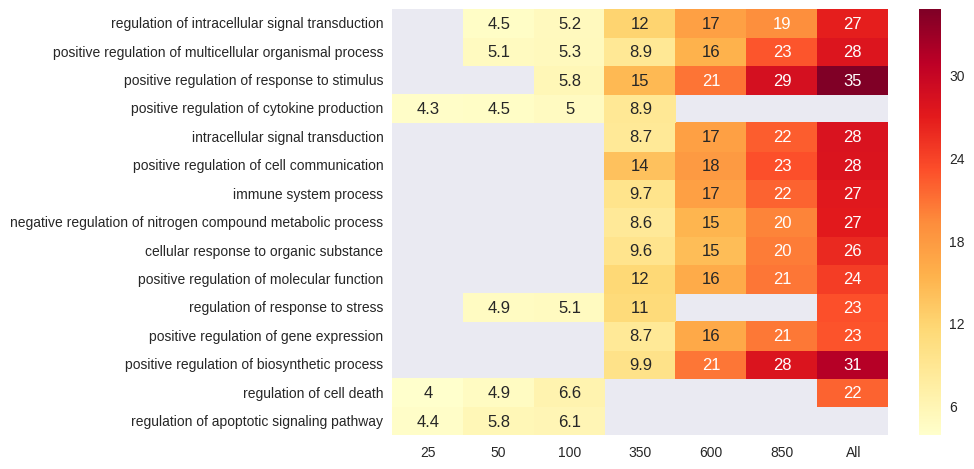

In [4]:
# Generate the heatmap of GSEA Biological Process
sns.heatmap(rnaBPDF.ix[:, 1:], cmap="YlOrRd", annot=True, yticklabels=list(rnaBPDF['GeneSet']))

In [5]:
# Merge the Top25, Top50, Top100, Top350, Top600, Top850 and TopAll Cellular Component data
rnaCCs = colNames
rnaCCDF = rnaCCdict[rnaCCs[0]]
for rnaCC in rnaCCs[1:]:
    rnaCCDF = pd.merge(rnaCCDF, rnaCCdict[rnaCC], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
rnaCCDF['# NaN'] = rnaCCDF.isnull().sum(axis=1)
rnaCCDF = rnaCCDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaCCDF['GeneSet']]
rnaCCDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    rnaCCDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaCCDF[colName]]

rnaCCDF = rnaCCDF[finColNames]
rnaCCDF

,GeneSet,25,50,100,350,600,850,All
0,membrane region,3.496209,5.798603,4.723538,8.004804,9.334419,12.275724,10.079355
1,cell projection,NaN,3.446117,5.528708,6.850781,11.149967,18.279014,18.562249
2,intrinsic component of plasma membrane,NaN,3.679854,6.705534,7.671620,7.359519,10.619789,13.527244
3,plasma membrane region,NaN,5.446117,4.714443,7.920819,7.962574,10.826814,8.452225
4,microtubule organizing center part,4.172631,3.373660,4.917215,4.122053,5.829738,NaN,NaN
5,mitochondrion,NaN,NaN,3.331614,6.749580,8.354578,13.051098,15.091515
6,perinuclear region of cytoplasm,NaN,NaN,3.472370,6.107905,8.863279,8.647817,12.534617
7,cell projection part,NaN,NaN,3.165579,5.412289,6.754487,12.705534,12.386158
8,centriole,4.627088,3.823909,5.663540,5.107905,7.384050,NaN,NaN
9,neuron projection,NaN,NaN,3.177832,4.899629,7.815309,10.619789,10.039529


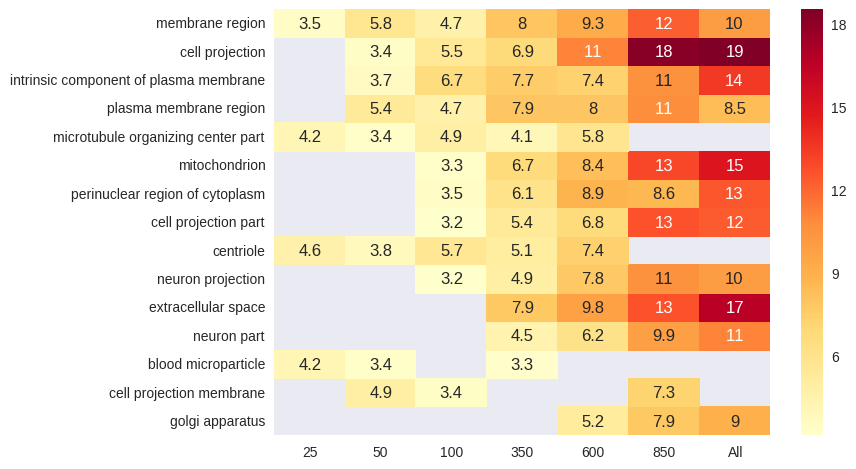

In [6]:
# Generate the heatmap of GSEA Cellular Component
sns.heatmap(rnaCCDF.ix[:, 1:], cmap="YlOrRd", annot=True, yticklabels=list(rnaCCDF['GeneSet']))

In [7]:
# Merge the Top25, Top50, Top100, Top350, Top600, Top850 and TopAll Molecular Function data
rnaMFs = colNames
rnaMFDF = rnaMFdict[rnaMFs[0]]
for rnaMF in rnaMFs[1:]:
    rnaMFDF = pd.merge(rnaMFDF, rnaMFdict[rnaMF], how='outer', on=geneSet)

# Declare 'NaN' column which consists of the sums of the 'NaN' of each row
rnaMFDF['# NaN'] = rnaMFDF.isnull().sum(axis=1)
rnaMFDF = rnaMFDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

# Restructure the gene set name
GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in rnaMFDF['GeneSet']]
rnaMFDF['GeneSet'] = GeneSetNew

# Calculate the -log10 for each p-value in the cells
for colName in colNames:
    rnaMFDF[colName] = [-(math.log(pvals, 10)) for pvals in rnaMFDF[colName]]

rnaMFDF = rnaMFDF[finColNames]
rnaMFDF

,GeneSet,25,50,100,350,600,850,All
0,macromolecular complex binding,NaN,3.344862,5.305395,7.728158,10.078314,12.393619,18.268411
1,enzyme binding,3.559091,3.527244,NaN,7.133122,10.655608,16.460924,17.982967
2,heat shock protein binding,6.793174,5.696804,4.473661,7.872895,8.012334,NaN,NaN
3,protein complex binding,NaN,NaN,3.920819,5.489455,6.866461,9.703335,13.634512
4,rna polymerase ii transcription factor activit...,NaN,NaN,3.525784,4.966576,8.438899,11.211832,12.860121
5,nucleic acid binding transcription factor acti...,NaN,NaN,NaN,7.494850,15.405607,21.386158,25.655608
6,transmembrane transporter activity,NaN,3.338187,4.454693,6.158015,6.732828,NaN,NaN
7,receptor binding,NaN,NaN,NaN,5.692504,11.829738,14.247184,17.308919
8,active transmembrane transporter activity,NaN,3.349692,6.161781,7.400117,7.122629,NaN,NaN
9,transition metal ion binding,NaN,3.342944,NaN,NaN,7.673664,9.628932,14.809668


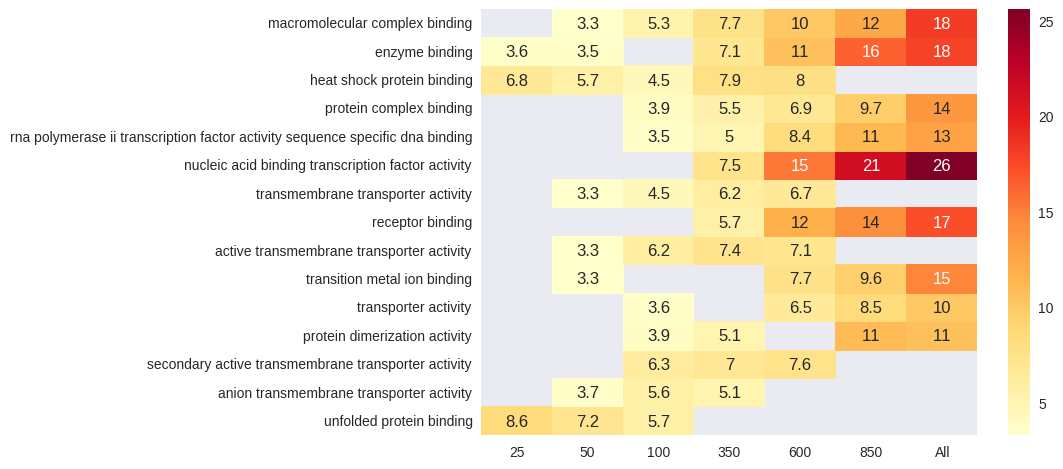

In [8]:
# Generate the heatmap of GSEA Cellular Component
sns.heatmap(rnaMFDF.ix[:, 1:], cmap="YlOrRd", annot=True, yticklabels=list(rnaMFDF['GeneSet']))